<a href="https://colab.research.google.com/github/SeoJiWon1/ML-DL/blob/main/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D(ANN_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D%2C_DNN_%EC%8B%AC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망
이미지 분류 문제

기본적인 인공 신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같다 

## 패션 MNIST

In [ ]:
# 텐서플로의 케라스 패키지를 임포트하고 패션 MNIST 데이터 다운로드
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
#load data 함수는 훈련 데이터와 테스트 데이터를 나누어 반환

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# 전달받은 데이터 크기 확인
print(train_input.shape, train_target.shape)
# 60000만개의 이미지, 각 이미지는 28 x 28, 타깃은 60000개의 1차원 배열

(60000, 28, 28) (60000,)


In [ ]:
# 테스트세트 크기 확인
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


<function matplotlib.pyplot.show(*args, **kw)>

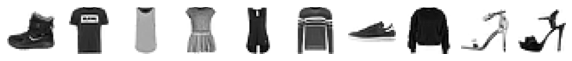

In [ ]:
# 그림 샘플 출력
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap= 'gray_r')
    axs[i].axis('off')
plt.show

In [ ]:
print([train_target[i] for i in range(10)])


[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 구분하기 

In [ ]:
# SGDClassifier는 2차원 입력을 다루지 못하므로 1차원 배열로 바꿈
train_scaled = train_input / 255.0  # -> 255로 나누어 0~1 사이값으로 정규화한다.
train_scaled = train_scaled.reshape (-1, 28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 5, random_state =42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8195666666666668


## 입력층, 밀집층, 출력층
출력층: 신경망의 최종 값을 만든다는 의미의 층

입력층: 입력된 x들을 부른다 

밀집층,은닉층: 입력층과 출력층 사이에 있는 모든 층 


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

## 인공 신경망으로 모델 만들기
인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용

In [ ]:
# 검증 세트 나누기
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state =42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [ ]:
# 케라스의 Dense 클래스 이용 필요한 매개변수는 뉴런 개수, 뉴련의 출력에 적용할 함수, 입력의 크기  --> 신경망 층 만듬
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))

In [ ]:
# 10개의 뉴런에서 출력되는 값을 확률로 바꾸기 위해서는 소프트맥스 함수를 사용
# 이진분류라면 softmax가 아닌 시그모이드 함수 사용 

In [ ]:
# 신경망 모델 만들기

In [ ]:
model = keras.Sequential(dense)

## 신경망 전달 과정
입력층(픽셀) -> 밀집층 -> 출력층(뉴런) -> 소프트맥스, 시그모이드 등의 활성함수(activation function)

In [ ]:
# 케라스 모델의 훈련 전 설정단계 
# compile() 수행, 반드시 지정해야 할 것 -> 활성함수 지정
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
# 다중 분류에서는 크로스 엔트로피 손실 함수를 사용 
# 이진분류 : loss = 'bimary_crossentropy'
# 다중분류 : loss = 'categorial_crossentropy'

## 모델 훈련

In [ ]:
model.fit(train_scaled, train_target, epochs = 5 )

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6031 - accuracy: 0.7956
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4787 - accuracy: 0.8389
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4573 - accuracy: 0.8487
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4439 - accuracy: 0.8525
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4369 - accuracy: 0.8558


## 검증 세트에서 모델의 성능 확인
모델 성능 평가 메서드는 evaluate()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4539 - accuracy: 0.8479


[0.4538944959640503, 0.8479166626930237]

# 심층 신경망
입력층(input layer)과 출력층(output layer) 사이에 여러 개의 은닉층(hidden layer)들로 이뤄진 인공신경망(Artificial Neural Network, ANN)이다.

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input /255.0
test_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

## 2개의 층을 가진 인공 신경망

In [ ]:
# 인공 신경망 모델에 2개의 층 추가 
dense1 = keras.layers.Dense(100, activation = 'sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')

## 심층 신경망 만들기


In [ ]:
model =keras.Sequential([dense1, dense2]) # 층들을 리스트로 만들어 전달 

In [ ]:
# summary() 메서드를 호출하여 층에 대한 정보 얻을 수 있음 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 층을 추가하는 다른 방법 
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,),
                       name = 'hidden'),
    keras.layers.Dense(10, activation = 'softmax', name = 'output')
], name = '패션 MNIST 모델')

In [ ]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5


ValueError: ignored

## 렐루 함수
층이 많은 심층 신경망일수록 시그모이드 함수는 학습을 어렵게 한다.

이릘 개선하기 위해 제안된 활성화 함수가 렐루함수

입력이 양수일 경우 입력을 통과시키고 음수일 경우 0

이미지 처리에 좋은 성능

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input /255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

In [ ]:
model.compile(loss = 'sparse_categorical__crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5


ValueError: ignored

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8808


[0.33730754256248474, 0.8807500004768372]

## 옵티마이저
현재까지의 하이퍼 파라미터 
은닉층의 개수, 뉴런 개수, 활성화 함수, 층의 종류, 배치 사이즈 매개변수, 에포크 매개변수 등 

기본 미니배치 개수는 32개 

* 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공
* 이들을 옵티마이저라고 부른다. 
* 가장 기본적인 옵티마이저는 확률적 경사 하강법인 SGD이다.

In [ ]:
# SGD사용하려면 compile() aptjemdml optimizer aoroqustnfmf 'sgd'로 지정 
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [ ]:
sgd = keras.optimizers.SGD()
model.compile(optimizer =sgd, loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [ ]:
sgd = keras.optimizers.SGD(learning_rate = 0.1)

### 적응적 학습률
모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있다. 
이런 학습률을 적응적 학습률이라고 함

* 대표적인 옵티마이저는 Adagrad와 RMSprop이다.
* 옵티마이저의 기본값이 'rmsprop'
* 모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam이다. 
* 위 3개 모두 학습률 learning_rate의 기본값을 0.001을 사용 

### Adam 사용

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5249 - accuracy: 0.8185
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3947 - accuracy: 0.8602
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3532 - accuracy: 0.8733
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3287 - accuracy: 0.8808
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3090 - accuracy: 0.8870


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8808


[0.33730754256248474, 0.8807500004768372]

# 신경망 모델 훈련

## 손실 곡선

In [ ]:
# MNIST 데이터셋 적재, 훈련 세트와 검증 세트로 나누기 
from tensorflow import keras
from sklearn.model_selection import train_test_split 
(train_inpun, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [ ]:
# 모델 만들기
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs =5 , verbose = 0)
# verbose : 훈련 과정 출력 조절 

In [ ]:
# history 객체에는 훈련 측정값이 담겨있는 history  딕셔너리가 들어있다. 
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


<function matplotlib.pyplot.show(*args, **kw)>

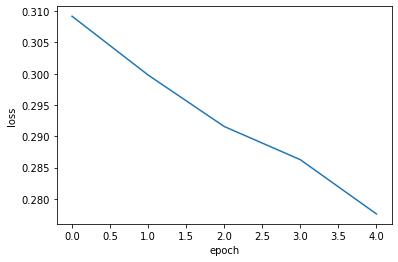

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

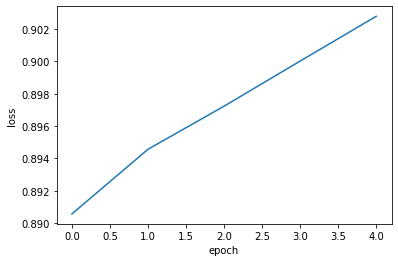

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

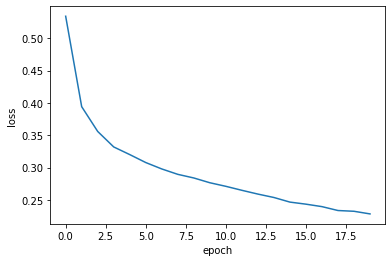

In [ ]:
# 에포크를 20으로 늘려서 모델 훈련 및 손실 그래프
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs =20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show

## 검증 손실

## 드롭아웃
훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴련의 출력을 0으로)
과대적합을 막는다.

랜덤하게 꺼지기 때문에 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 한다. 

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


<function matplotlib.pyplot.show(*args, **kw)>

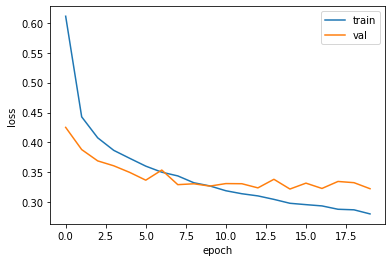

In [ ]:
# 훈련 손실과 검증 손실의 그래프를 그려 비교
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs =20, verbose=0,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show

## 모델 저장과 복원

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',
              metrics ='accuracy')
history = model.fit(train_scaled, train_target, epochs =10, verbose = 0,
                    validation_data = (val_scaled, val_target))

In [ ]:
model.save_weights('model-weights.h5')

In [ ]:
model.save('model-whole.h5')

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Jan  9 16:11 model-weights.h5
-rw-r--r-- 1 root root 982664 Jan  9 16:12 model-whole.h5


## 콜백